In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 6.7 kB/s 
     |████████████████████████████████| 4.0 MB 33.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
import torch
print(torch.__version__)

1.4.0


In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
from fastai.vision import get_transforms, ImageDataBunch, cnn_learner, ClassificationInterpretation, models 
from fastai.metrics import error_rate, accuracy

In [ ]:
import fastai
fastai.__version__

'1.0.61'

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_directory = '/content/drive/MyDrive/DataScience/FastAI_IntelImageClassification/dataset'

In [ ]:
data_augment = get_transforms(do_flip=True, max_rotate=10.0, )

In [ ]:
image_data = ImageDataBunch.from_folder(data_directory, train='train', valid='test', ds_tfms=data_augment, size=128, bs=64, num_workers=8)

In [ ]:
print(image_data.classes,image_data.c)
print(len(image_data.train_ds), len(image_data.valid_ds))

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'] 6
14034 3000


In [ ]:
# import os
# for (root,dirs,files) in os.walk(data_directory, topdown=True):
#   print (root)
#   print (dirs)
#   print (files)
#   print ('--------------------------------')

In [ ]:
learn = cnn_learner(image_data, models.resnet34, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


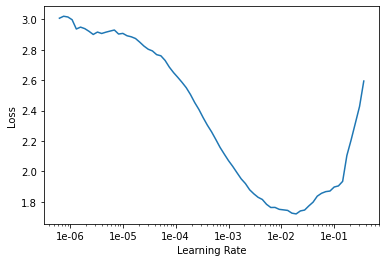

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.470082,0.317310,0.906333,15:19
1,0.327725,0.243705,0.916333,01:42
2,0.250730,0.223536,0.927000,01:42
3,0.179780,0.185741,0.933667,01:43
4,0.115376,0.174350,0.940333,01:42


In [ ]:
learn.save('/content/drive/MyDrive/DataScience/FastAI_IntelImageClassification/models/model_resnet34_5epochs')

In [ ]:
dir(models)

['BasicBlock',
 'Darknet',
 'DynamicUnet',
 'ResLayer',
 'ResNet',
 'SqueezeNet',
 'UnetBlock',
 'WideResNet',
 'XResNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'darknet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'mobilenet_v2',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'unet',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'wrn',
 'wrn_22',
 'xception',
 'xresnet',
 'xresnet101',
 'xresnet152',
 'xresnet18',
 'xresnet18_deep',
 'xresnet34',
 'xresnet34_deep',
 'xresnet50',
 'xresnet50_deep']

In [ ]:
learn.load('/content/drive/MyDrive/DataScience/FastAI_IntelImageClassification/models/model_resnet34_5epochs')

Learner(data=ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
glacier,glacier,glacier,glacier,glacier
Path: /content/drive/MyDrive/DataScience/FastAI_IntelImageClassification/dataset;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
forest,forest,forest,forest,forest
Path: /content/drive/MyDrive/DataScience/FastAI_IntelImageClassification/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

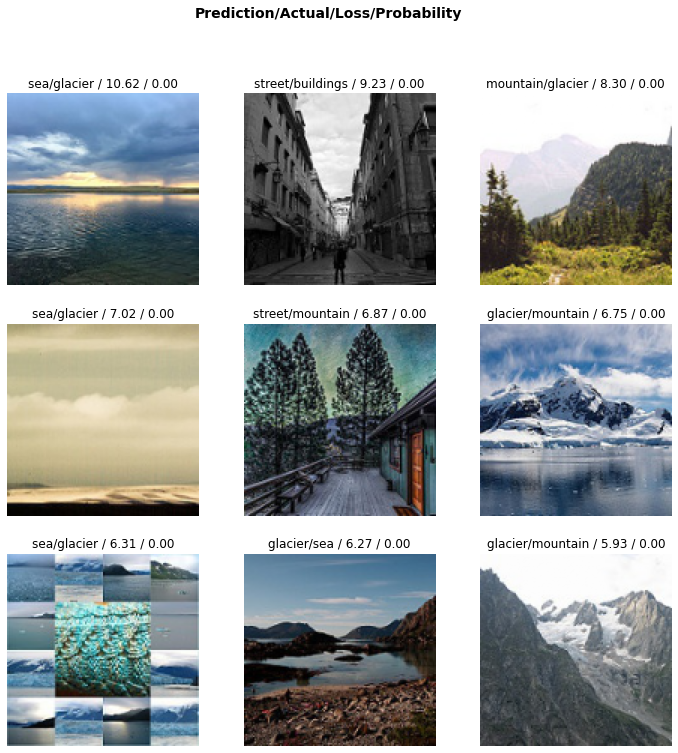

In [ ]:
interp.plot_top_losses(9, figsize=(12,12), heatmap=False)

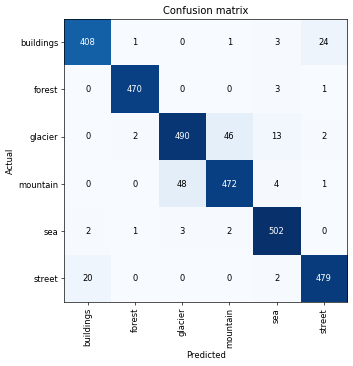

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
# model = load_learner('/content/drive/MyDrive/DataScience/FastAI_IntelImageClassification/models/model_resnet50_5epochs')
# learn.predict()


In [ ]:
# doc(predict)